In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np


# Load data
data = pd.read_csv(r"CLEAN_DATA\Europe_2015_manifesto_gini_ps.csv")

# Drop the rows that have missing values
data.dropna(subset=['Gini coefficient'], inplace=True)

X = data[['stance_positivity_score']] # IV
y = data['Gini coefficient'] # DV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Combine coefficients into a single array for statsmodels
coefficients_statsmodels = np.concatenate(([intercept], coefficients))

# Predict Gini index values on training and testing sets
predicted_gini_train = model.predict(X_train)
predicted_gini_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, predicted_gini_train, squared=False)
test_rmse = mean_squared_error(y_test, predicted_gini_test, squared=False)
train_r2 = r2_score(y_train, predicted_gini_train)
test_r2 = r2_score(y_test, predicted_gini_test)

# Add predicted Gini index to the DataFrame
data['Predicted_Gini'] = model.predict(X)

# Use statsmodels to further analyze the regression
X_with_intercept = sm.add_constant(X)  # Add intercept to X for statsmodels
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Print the summary of the regression results from statsmodels
print(results.summary())

# Display the DataFrame
display(data)

C:\Users\sanne\AppData\Local\Temp\ipykernel_18540\555720871.py:10: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"CLEAN_DATA\Europe_2015_manifesto_gini_ps.csv")


                            OLS Regression Results                            
Dep. Variable:       Gini coefficient   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.67
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           0.000132
Time:                        15:04:53   Log-Likelihood:                 2533.6
No. Observations:                2080   AIC:                            -5063.
Df Residuals:                    2078   BIC:                            -5052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Unnamed: 0.1,Unnamed: 0,country,countryname,oecdmember,eumember,edate,date,party,partyname,...,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm,Gini coefficient,stance_positivity_score,Predicted_Gini
99,99,99,11,Sweden,10,10.0,2002-09-15,200209,11110,Green Ecology Party,...,-26.087,0.621,0.000,22.981,3.727,2023a,9WG2HR,0.257998,21.117,0.331737
100,100,100,11,Sweden,10,10.0,2002-09-15,200209,11220,Left Party,...,-33.661,4.914,0.000,23.587,0.491,2023a,QLAVSZ,0.257998,31.694,0.335281
101,101,101,11,Sweden,10,10.0,2002-09-15,200209,11320,Social Democratic Labour Party,...,-18.315,0.366,4.396,15.751,0.733,2023a,1NEP9N,0.257998,44.691,0.339637
102,102,102,11,Sweden,10,10.0,2002-09-15,200209,11420,Liberal People’s Party,...,0.932,2.098,6.760,7.925,0.233,2023a,5W5GDE,0.257998,36.829,0.337002
103,103,103,11,Sweden,10,10.0,2002-09-15,200209,11520,Christian Democrats,...,6.325,1.205,4.217,15.663,0.301,2023a,OCUFNA,0.257998,37.952,0.337378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5072,5072,5072,181,South Africa,0,0.0,2014-05-07,201405,181210,Economic Freedom Fighters,...,-27.799,3.918,0.000,18.843,0.187,2023a,FYLAK1,0.630261,47.390,0.340541
5073,5073,5073,181,South Africa,0,0.0,2014-05-07,201405,181310,African National Congress,...,-31.926,3.885,0.000,18.412,0.169,2023a,SES5XV,0.630261,47.637,0.340624
5074,5074,5074,181,South Africa,0,0.0,2014-05-07,201405,181411,Democratic Alliance,...,-8.120,3.134,0.427,13.675,0.142,2023a,MEH5KV,0.630261,57.978,0.344089
5075,5075,5075,181,South Africa,0,0.0,2014-05-07,201405,181420,Congress of the People,...,-32.812,1.042,0.000,10.938,2.083,2023a,NU5PXG,0.630261,27.604,0.333911


In [9]:
import matplotlib.pyplot as plt

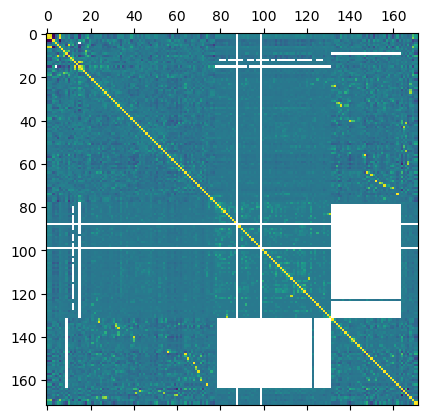

In [10]:
correlations = data.select_dtypes(include="number").corr()
plt.matshow(correlations)
plt.show()